
### Image Enhancement
Image enhancement is the process of improving the visual quality or interpretability of a digital image. It aims to highlight important features, suppress noise, improve contrast, or make images more suitable for human or machine analysis. Enhancement techniques are broadly classified into:
* Point Operations (Intensity Transformations) : operate on individual pixels.
* Spatial Filtering : operate on a neighborhood of pixels to enhance edges or reduce noise.

### Negative Transformation
Negative transformation inverts the intensity values of an image.
* For an 8-bit image with intensity range [0, 255], the transformation is:
                       s=L−1−r
Where:
* r = original intensity
* s = transformed intensity
* L = maximum intensity + 1 (for 8-bit images, L = 256)
Effect: Dark regions become bright and bright regions become dark. Useful for enhancing details in dark regions of an image.

### Logarithmic (Log) Transformation
Log transformation expands dark pixel values and compresses high-intensity values.
* Transformation formula:
                  s=c⋅log(1+r)
Where:
* r = original intensity
* s = transformed intensity
* c = scaling constant
Effect: Enhances details in darker regions; commonly used for images with large dynamic range.

### Power-Law (Gamma) Transformation
Power-law (gamma) transformation is used for contrast correction and brightness adjustment.
* Transformation formula:
s=c⋅r^γ
Where:
* r = input intensity (normalized between 0 and 1)
* γ = gamma value (>1 darkens image, <1 brightens image)
* c = scaling constant
Effect: Flexible method for enhancing images in various lighting conditions.

### Histogram Equalization
Histogram equalization improves image contrast by redistributing pixel intensity values across the available range.
* High contrast is achieved by spreading frequently occurring intensity values.
* Especially useful for low-contrast images where details are hidden.

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def histogram_equalization(img):
  #1.Flatten the image to a 1D array
  flat =img.flatten()

 #Compute histogram(256 bins for grayscale)
  hist =  np.bincount(flat, minlength=256)

 #3.Normalize histogram->  PDF
  pdf = hist/np.sum(hist)
    
 #4.Compute cumulative distribution function(CDF)
  cdf=np.cumsum(pdf)
    
 #5.Normalize CDF to 0-255(mapping function)
  cdf_normalized = np.round(cdf * 255).astype(np.uint8)

 #6.Apply the mapping to get equalized image 
  equalized_img = cdf_normalized[flat].reshape(img.shape)

  return equalized_img, hist, cdf_normalized

In [4]:
img=cv2.imread('IPimg1.jpeg', cv2.IMREAD_GRAYSCALE)

In [5]:
img.shape

(225, 225)

In [6]:
eq_img, hist_before, mapping= histogram_equalization(img)

In [7]:
hist_after = np.bincount(eq_img.flatten(), minlength=256)

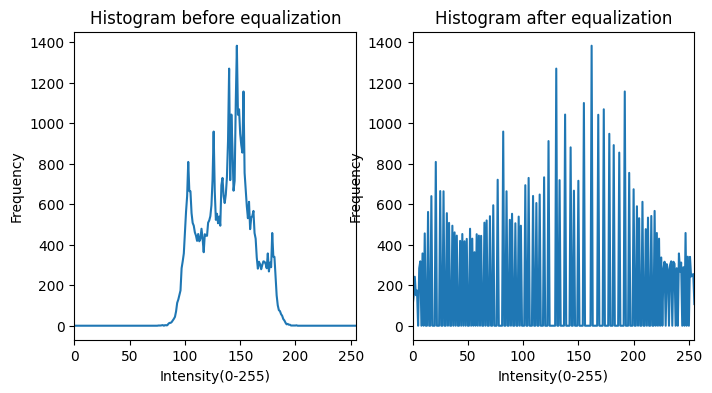

In [8]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Histogram before equalization")
plt.xlabel("Intensity(0-255)")
plt.ylabel("Frequency")
plt.plot(hist_before)
plt.xlim([0, 255])

plt.subplot(1,2,2)
plt.title("Histogram after equalization")
plt.xlabel("Intensity(0-255)")
plt.ylabel("Frequency")
plt.plot(hist_after)
plt.xlim([0, 255])

plt.tight_layout
plt.show()

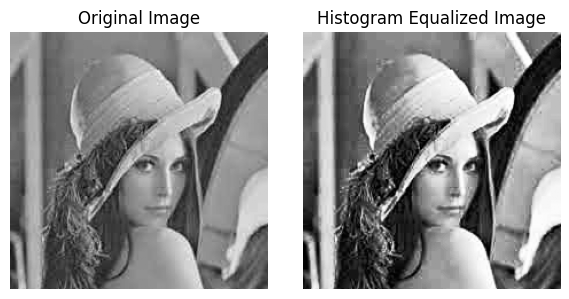

In [9]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")


plt.subplot(1,2,2)
plt.title("Histogram Equalized Image")
plt.imshow(eq_img, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

### Histogram equalization for RGB image

In [10]:
def histogram_equalization(gray):
    flat = gray.flatten()
    hist = np.bincount(flat, minlength=256)
    pdf = hist / np.sum(hist)
    cdf = np.cumsum(pdf)
    mapping = np.round(cdf * 255).astype(np.uint8)
    eq = mapping[flat].reshape(gray.shape)
    return eq, hist

In [11]:
rgb_img = cv2.imread('IPimg3.jpg')
bgr_img =rgb_img.copy()

lab = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LAB)

L, A, B =cv2.split(lab)

In [12]:
L_eq, hist_before = histogram_equalization(L)
hist_after = np.bincount(L_eq.flatten(), minlength=256)

lab_eq =cv2.merge((L_eq, A, B))

bgr_eq =cv2.cvtColor(lab_eq, cv2.COLOR_LAB2BGR)

rgb_before = cv2.cvtColor(bgr_img, cv2. COLOR_BGR2RGB)
rgb_after = cv2.cvtColor(bgr_eq, cv2. COLOR_BGR2RGB)

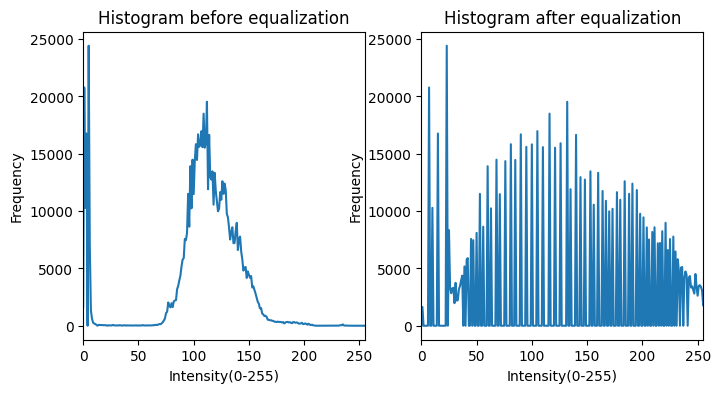

In [13]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Histogram before equalization")
plt.xlabel("Intensity(0-255)")
plt.ylabel("Frequency")
plt.plot(hist_before)
plt.xlim([0, 255])

plt.subplot(1,2,2)
plt.title("Histogram after equalization")
plt.xlabel("Intensity(0-255)")
plt.ylabel("Frequency")
plt.plot(hist_after)
plt.xlim([0, 255])

plt.tight_layout
plt.show()

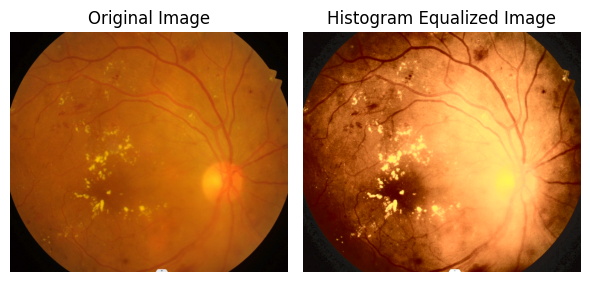

In [14]:
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(rgb_before)
plt.axis("off")


plt.subplot(1,2,2)
plt.title("Histogram Equalized Image")
plt.imshow(rgb_after)
plt.axis("off")

plt.tight_layout()
plt.show()

In [15]:
def negative_transform(img):
    L=256
    neg = (L-1) - img
    return neg.astype(np.uint8)

In [16]:
def log_transform(img):
    img = img.astype(np.float32)
    c = 255 / np.log( 1 + np.max(img))
    log_img = c * np.log(1 + img)
    return np.uint8(np.clip(log_img, 0, 255))

In [24]:
def gamma_transform(img, gamma):
    img = img.astype(np.float32)
    img_norm = img / 255.0
    gamma_img = np.power(img_norm, gamma)
    gamma_img = gamma_img * 255
    return np.uint8(np.clip(gamma_img, 0, 255))

In [20]:
img = cv2.imread('chest_X_ray.jpeg', cv2.IMREAD_GRAYSCALE)

In [21]:
neg = negative_transform(img)

In [22]:
log_img = log_transform(img)

In [25]:
gamma_img = gamma_transform(img, gamma=0.5)

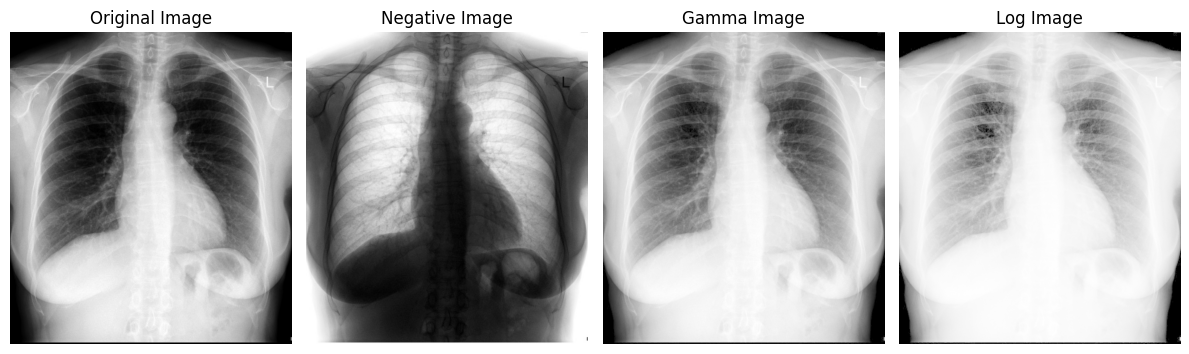

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')
plt.axis("off")


plt.subplot(1,4,2)
plt.title("Negative Image")
plt.imshow(neg, cmap='gray')
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Gamma Image")
plt.imshow(gamma_img, cmap='gray')
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Log Image")
plt.imshow(log_img, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()